In [50]:
import pandas as pd
import numpy as np

#leemos la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

#a. eliminamos los valores duplicados
airbnb_data.drop_duplicates(inplace=True)

#b. eliminamos las columnas que no tiene informacion de interes
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

#c. con el articulo de 'missing-data imputation' imputamos los valores faltantes con la media (ver implicancias en el reporte).
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# d. identificamos los outliers utilizando el rango intercuartílico (IQR) y luego los establecimos como NaN. 
# Calcular cuartiles
Q1 = airbnb_data.quantile(0.25, numeric_only=True)
Q3 = airbnb_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outlier_threshold = 1.5
outlier_mask = (airbnb_data.select_dtypes(include=np.number) < (Q1 - outlier_threshold * IQR)) | (airbnb_data.select_dtypes(include=np.number) > (Q3 + outlier_threshold * IQR))

airbnb_data[outlier_mask] = np.nan

# e. transformamos las variables 'neighbourhood_group' y 'room_type' en variables numericas
airbnb_data_encoded = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# f. agrupamos los datos y contamos la cantidad de oferentes por vecindario
neighbourhood_ofer= airbnb_data_encoded.groupby('neighbourhood_group_Manhattan').size().reset_index(name='offer_group')

# unimos los datos
airbnb_data_encoded = pd.merge(airbnb_data_encoded, neighbourhood_ofer, on='neighbourhood_group_Manhattan', how='left')


print(airbnb_data_encoded.head())



                                               name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237  149.0             1.0   
1       Midtown  40.75362  -73.98377  225.0             1.0   
2        Harlem  40.80902  -73.94190  150.0             3.0   
3  Clinton Hill  40.68514  -73.95976   89.0             1.0   
4   East Harlem  40.79851  -73.94399   80.0            10.0   

   number_of_reviews last_review  neighbourhood_group_Bronx  \
0                9.0  2018-10-19                          0   
1               45.0  2019-05-21                          0   
2                0.0   

In [48]:
# 1. realizamos la matriz de correlaciones 
# primero seleccionamos las columnas deseadas
selected_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
airbnb_data_selected = airbnb_data[selected_columns]

# calculamos la matriz y la imprimimos
correlation_matrix = airbnb_data_selected.corr()
print(correlation_matrix)

KeyError: "['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room'] not in index"

In [28]:
# Seleccionar las columnas deseadas, incluidas las columnas transformadas por one-hot encoding
selected_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
airbnb_data_selected = airbnb_data[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = airbnb_data_selected.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                                   latitude  longitude     price  \
latitude                           1.000000   0.083898  0.077664   
longitude                          0.083898   1.000000 -0.394719   
price                              0.077664  -0.394719  1.000000   
minimum_nights                    -0.010686  -0.053522  0.059843   
number_of_reviews                 -0.027373   0.058765 -0.034383   
neighbourhood_group_Bronx          0.276732   0.222263 -0.096394   
neighbourhood_group_Brooklyn      -0.686899   0.206733 -0.179146   
neighbourhood_group_Manhattan      0.618465  -0.506588  0.327417   
neighbourhood_group_Queens         0.022240   0.458197 -0.169180   
neighbourhood_group_Staten Island -0.160960        NaN -0.040387   
room_type_Entire home/apt          0.000089  -0.242648  0.619572   
room_type_Private room            -0.002045   0.234134 -0.575924   
room_type_Shared room              0.006425   0.031166 -0.141970   

                                   minimum_nigh

In [29]:
import sys
!{sys.executable} -m pip install seaborn

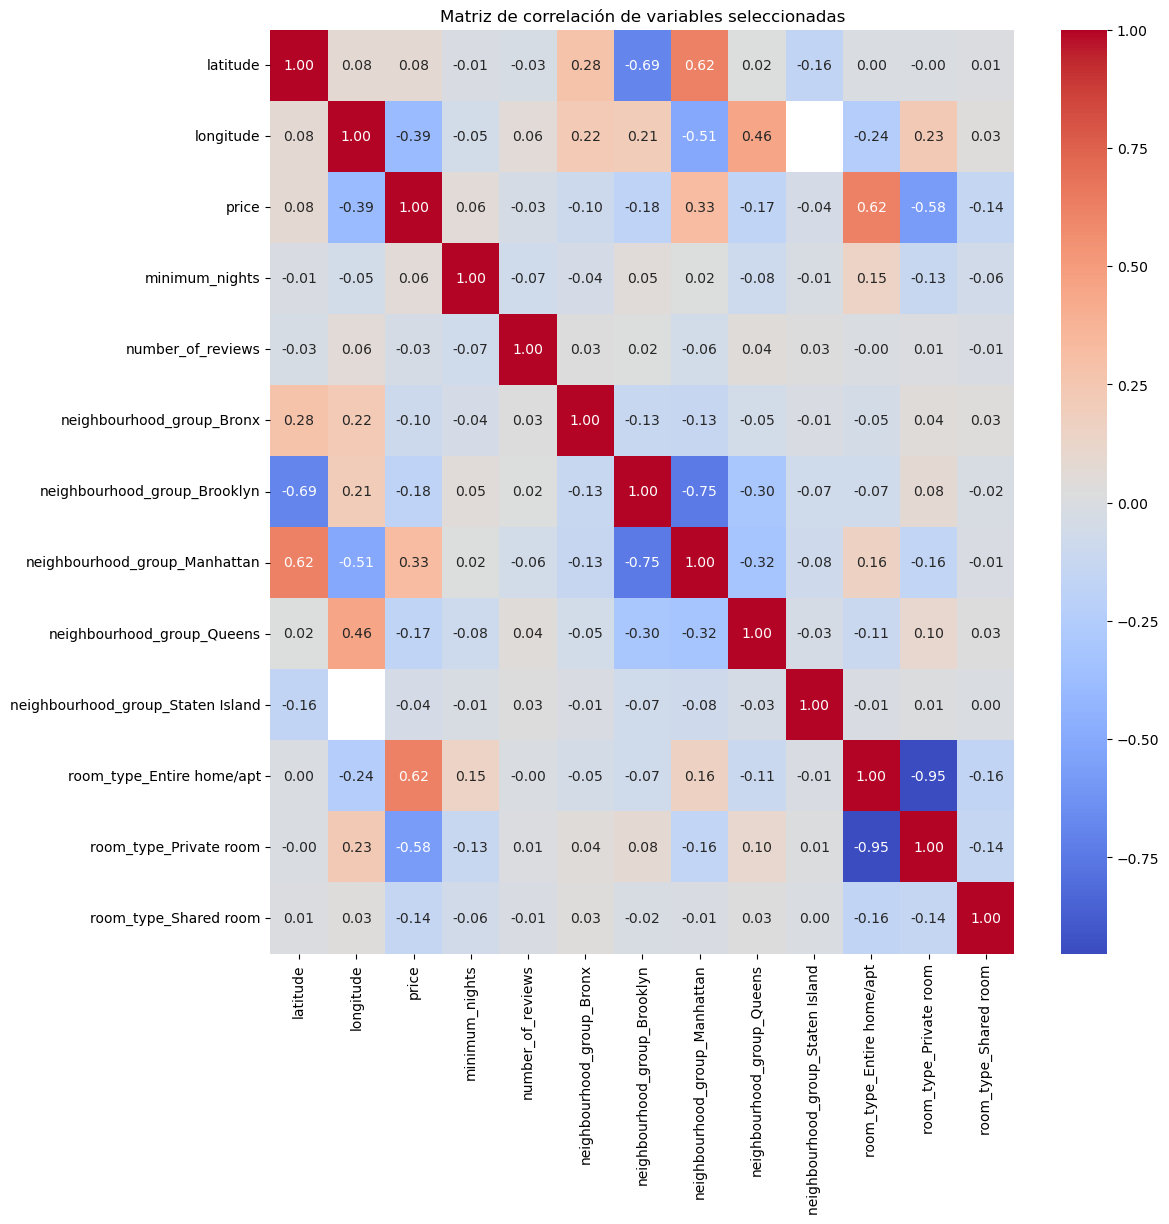

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1.b creamos un grafico de la matriz de correlación

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()


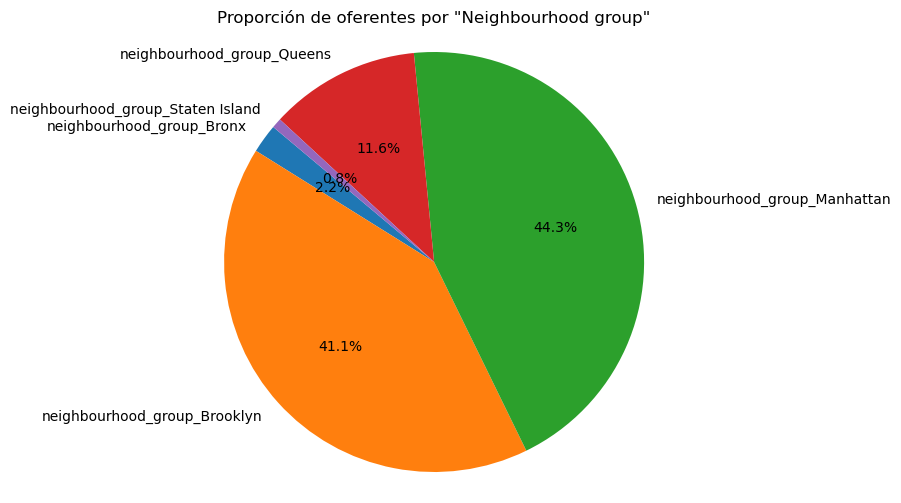

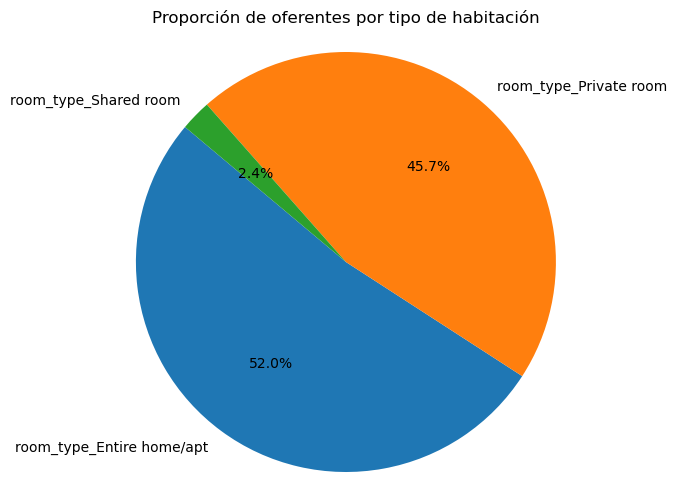

In [31]:
import matplotlib.pyplot as plt

# 2. calculamos la proporción de oferentes por "Neighbourhood group"
neighbourhood_group_columns = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']
neighbourhood_group_counts = airbnb_data[neighbourhood_group_columns].sum()
neighbourhood_group_proportions = neighbourhood_group_counts / len(airbnb_data)

#realizamos grafico para mostrar la composición de "Neighbourhood group"
plt.figure(figsize=(8, 6))
plt.pie(neighbourhood_group_proportions, labels=neighbourhood_group_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de oferentes por "Neighbourhood group"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# calculamos la proporción de oferentes por tipo de habitación 
room_type_columns = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
room_type_counts = airbnb_data[room_type_columns].sum()
room_type_proportions = room_type_counts / len(airbnb_data)

# realizamos grafico para mostrar la composición por tipo de habitación
plt.figure(figsize=(8, 6))
plt.pie(room_type_proportions, labels=room_type_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de oferentes por tipo de habitación')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


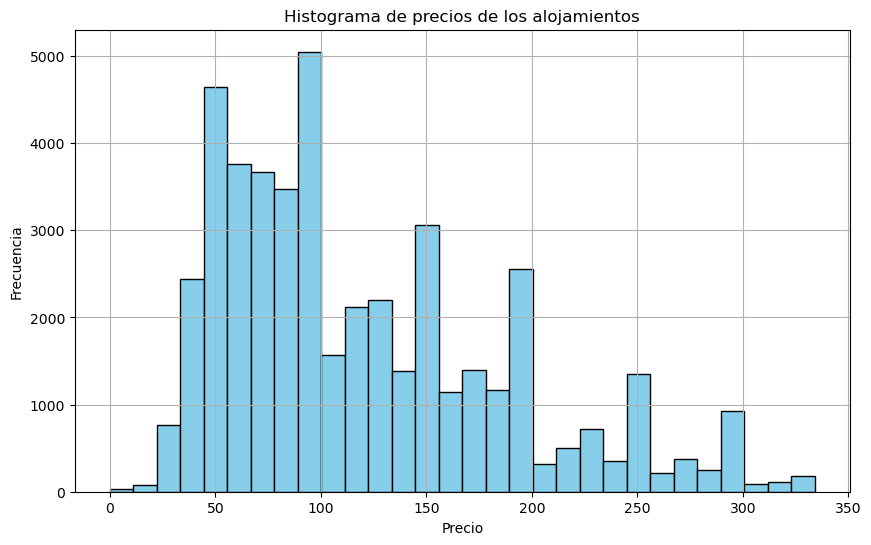

Precio mínimo: 0.0
Precio máximo: 334.0
Precio promedio: 119.98251381876223

Media de precio por 'Neighbourhood group':
neighbourhood_group_Bronx             75.963762
neighbourhood_group_Brooklyn         102.095211
neighbourhood_group_Manhattan        131.427031
neighbourhood_group_Queens            87.389069
neighbourhood_group_Staten Island     87.321716
dtype: float64

Media de precio por tipo de habitación:
room_type_Entire home/apt    145.762236
room_type_Private room        77.882662
room_type_Shared room         58.168966
dtype: float64


In [16]:
import matplotlib.pyplot as plt

# 3. realizamos un histograma de los precios de los alojamientos
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de los alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# obtenemos precios mínimos, máximos y promedio
precio_minimo = airbnb_data['price'].min()
precio_maximo = airbnb_data['price'].max()
precio_promedio = airbnb_data['price'].mean()

print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)
print("Precio promedio:", precio_promedio)

# buscamos la media de precio por "Neighbourhood group"
neighbourhood_group_columns = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']
media_precio_por_neighbourhood = airbnb_data[neighbourhood_group_columns].multiply(airbnb_data['price'], axis=0).sum() / airbnb_data[neighbourhood_group_columns].sum()

print("\nMedia de precio por 'Neighbourhood group':")
print(media_precio_por_neighbourhood)

# buscamos la media de precio por tipo de habitación 
room_type_columns = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
media_precio_por_room_type = airbnb_data[room_type_columns].multiply(airbnb_data['price'], axis=0).sum() / airbnb_data[room_type_columns].sum()

print("\nMedia de precio por tipo de habitación:")
print(media_precio_por_room_type)

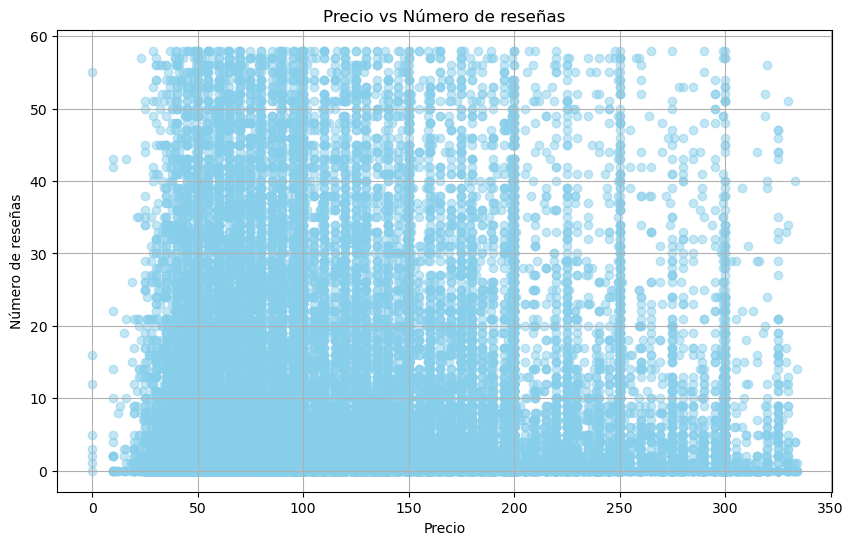

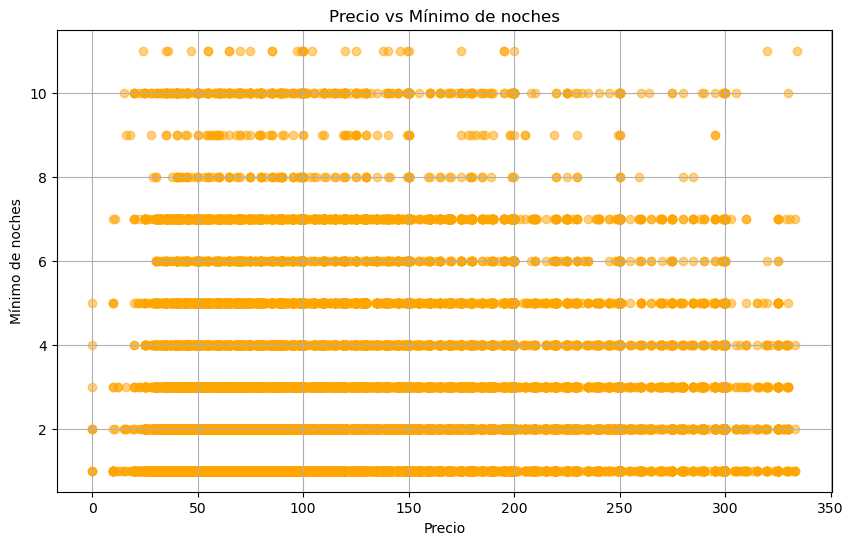

In [17]:
import matplotlib.pyplot as plt

# 4. realiamizamos dos scatter plot con dos variables de interes: 
#scatter plot 1: precio y número de reseñas
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_data['price'], airbnb_data['number_of_reviews'], alpha=0.5, color='skyblue')
plt.title('Precio vs Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de reseñas')
plt.grid(True)
plt.show()

# scatter plot 2: precio y mínimo de noches
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_data['price'], airbnb_data['minimum_nights'], alpha=0.5, color='orange')
plt.title('Precio vs Mínimo de noches')
plt.xlabel('Precio')
plt.ylabel('Mínimo de noches')
plt.grid(True)
plt.show()

In [18]:
import sys
!{sys.executable} -m pip install scikit-learn

In [19]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

# leemos la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

# eliminamos valores duplicados
airbnb_data.drop_duplicates(inplace=True)

# eliminamos las columnas sin información de interes
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

# Iimputamos de valores faltantes con la media
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# tranformamos las variables categóricas a numéricas 
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# calculamos la cantidad de oferentes por "Neighbourhood group"
offer_group = airbnb_data[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']].sum(axis=1)

# agregamos la columna 'offer_group' al dataframe
airbnb_data['offer_group'] = offer_group

print(airbnb_data.head())

# normalizamos los datos 
X_normalized = (airbnb_data[numeric_columns] - airbnb_data[numeric_columns].mean()) / airbnb_data[numeric_columns].std()

# 5. realizamos analisis de componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

# obtenemos el porcentaje de varianza  que se logra explifar con dos componentes principales
varianza_explicada = pca.explained_variance_ratio_
print("Porcentaje de varianza explicada por las dos primeras componentes principales:")
print(varianza_explicada)

# obtenemos los 'loadings'
loadings = pca.components_
print("Loadings de las componentes principales:")
print(loadings)

# graficamos en dos dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5, color='skyblue')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

                                               name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237  149.0               1   
1       Midtown  40.75362  -73.98377  225.0               1   
2        Harlem  40.80902  -73.94190  150.0               3   
3  Clinton Hill  40.68514  -73.95976   89.0               1   
4   East Harlem  40.79851  -73.94399   80.0              10   

   number_of_reviews last_review  neighbourhood_group_Bronx  \
0                  9  2018-10-19                          0   
1                 45  2019-05-21                          0   
2                  0   

NameError: name 'numeric_columns' is not defined

In [37]:
#Parte 3: Prediccion
# primero importamos las librerías necesarias para trabajar.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#leemos la base de datos 
df = pd.read_csv("BaseAirbnbNY.csv")

#1. eliminamos de la base todas las variables relacionadas al precio.
X = df.drop(columns=['price'])

# Mostramos las primeras filas de las características
print(X.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  minimum_nights  number_of_reviews last_review  \
0     Private room               1                  9  2018-10-19   
1 

In [38]:
!pip install scikit-learn

In [40]:
#primero definimos la variable 'price' como variable dependientes en la base de entrenamiento, vector y.
y = df['price']

#luego, partimos la base en una base de prueba, test, y una de entrenamiento. Segun la consigna(70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

#para ver la cantidad de observaciones en la base de entrenamiento y de test: 
print(f"obs. en entrenamiento: {len(X_train)}")
print(f"obs. en prueba: {len(X_test)}")


obs. en entrenamiento: 34233
obs. en prueba: 14672


In [41]:
print(X_train.head())

             id                                            name    host_id  \
48062  36065361             Artist Luxe Loft Prime Williamsburg  271035656   
7904    6054194             Bright, Clean 1 Bd 2 Blks to Trains    2568690   
15039  12000617    Comfortable Bedroom right by express subway!   64170751   
37231  29585263  Brooklyn Bedroom - Warm & Cozy Near Subway (2)  217642569   
40026  31086356                                       HOME AWAY   85664849   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
48062      Josh            Brooklyn        Williamsburg  40.70835  -73.95368   
7904     Collin              Queens             Astoria  40.75673  -73.92530   
15039      Dani            Brooklyn       Crown Heights  40.66759  -73.95187   
37231       Jci            Brooklyn  Bedford-Stuyvesant  40.68562  -73.94921   
40026    Ismail            Brooklyn       Crown Heights  40.67637  -73.91352   

             room_type  minimum_nights  number_of_

In [42]:

#seleccionamos solo las columnas numéricas para la regresión lineal
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
base_numerica = df[columnas_numericas]

#eliminamos  'price'
base_numerica = base_numerica.drop(columns=['price'])

#agregamos la columna de unos 
base_numerica['intercept'] = 1

#partimos la base en una base de prueba, test, y una de entrenamiento. 
X_train, X_test, y_train, y_test = train_test_split(base_numerica, y, test_size=0.3, random_state=201)

#imputamos los valores faltantes 
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
imputer_y = SimpleImputer(strategy='mean')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

#implmentamos una regresión lineal 
model_t = LinearRegression(fit_intercept=False).fit(X_train, y_train)

#mostramos los coeficientes obtenidos
print("\nCoeficientes:", model_t.coef_)
for n, coef in enumerate(model_t.coef_):
    print(base_numerica.columns[n], round(model_t.coef_[n], 3))




Coeficientes: [    -0.00000049      0.00000003    203.92824357   -820.59901132
      0.13993377     -0.39879007      4.02668122      0.07874849
      0.17685949 -68848.50303942]
id -0.0
host_id 0.0
latitude 203.928
longitude -820.599
minimum_nights 0.14
number_of_reviews -0.399
reviews_per_month 4.027
calculated_host_listings_count 0.079
availability_365 0.177
intercept -68848.503
